### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, classification_report, accuracy_score,log_loss
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.feature_selection import RFE
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r'D:\Data\titanic_train.csv')
test=pd.read_csv(r'D:\Data\titanic_test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Analysis

In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


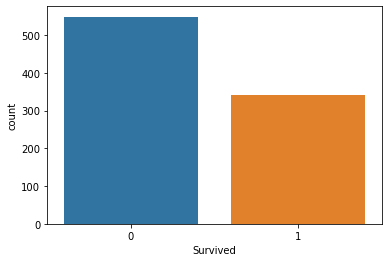

In [9]:
sns.countplot(train["Survived"])

around 550 passengers are did not survived and 350 passengers are survived 

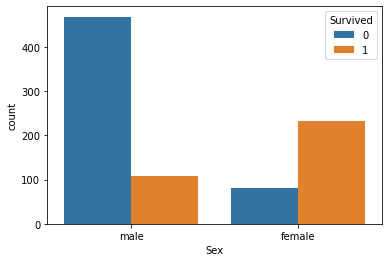

In [10]:
sns.countplot(x="Sex", hue="Survived", data=train)

majority of males who didn't survived and majority of females who are survived

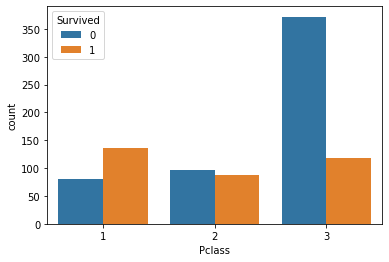

In [11]:
sns.countplot(x="Pclass", hue="Survived", data=train)

in class 1 majority of survived, in class 2 majority of who didnt survived and in class 3 majority of who didn't survived


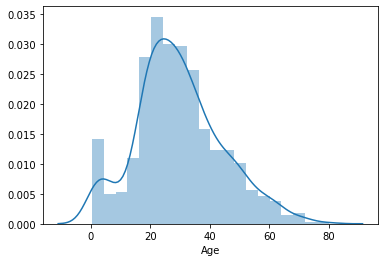

In [12]:
sns.distplot(train["Age"])

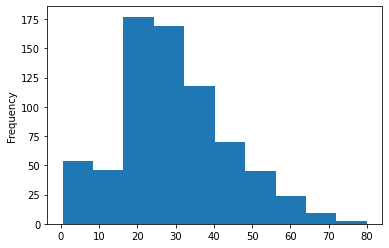

In [13]:
train["Age"].plot.hist()

more young and middle age passengers travelling in titanic

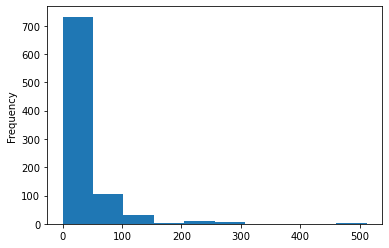

In [14]:
train["Fare"].plot.hist()

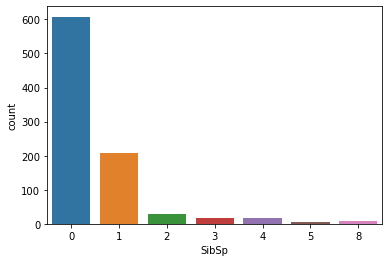

In [15]:
sns.countplot(train["SibSp"])

#### DATA PROCESSING

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

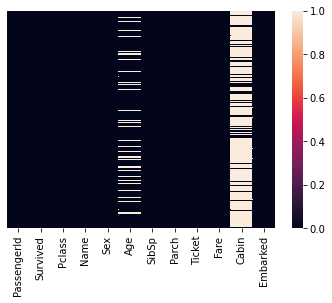

In [17]:
sns.heatmap(train.isnull(), yticklabels=False)

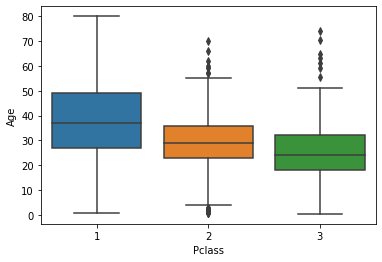

In [18]:
sns.boxplot(x="Pclass", y="Age", data=train)

age in first and second class tend to be older rather then third class.

In [19]:
train["Age"].isnull().sum()

177

In [20]:
x=train["Age"].isnull().sum()/train.shape[0]*100
print(f'percentage of missing records in age is:{x}')


percentage of missing records in age is:19.865319865319865


In [21]:
train["Age"].fillna(train.groupby(['Pclass', 'Sex']).Age.transform('mean'), inplace=True)

In [22]:
train["Cabin"].isnull().sum()

687

In [23]:
y=train["Cabin"].isnull().sum()/train.shape[0]*100
print(f'percentage of missing value in cabin column is:{y}')

percentage of missing value in cabin column is:77.10437710437711


In [24]:
train["Embarked"].isnull().sum()

2

In [25]:
print(f'percentage of missing value in embarked column is:{train["Embarked"].isnull().sum()/train.shape[0]*100}')
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

percentage of missing value in embarked column is:0.22446689113355783


In [26]:
train["Name"].value_counts()

Mellinger, Miss. Madeleine Violet    1
Goldschmidt, Mr. George B            1
Madill, Miss. Georgette Alexandra    1
Murphy, Miss. Margaret Jane          1
Jacobsohn, Mr. Sidney Samuel         1
                                    ..
Morrow, Mr. Thomas Rowan             1
Kallio, Mr. Nikolai Erland           1
Rogers, Mr. William John             1
Keane, Miss. Nora A                  1
Nysveen, Mr. Johan Hansen            1
Name: Name, Length: 891, dtype: int64

In [27]:
sex_dummy=pd.get_dummies(train["Sex"], prefix="sex", prefix_sep="_" )

In [28]:
sex_dummy

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
sex_dummy.drop(["sex_male"], axis=1,inplace=True)

In [30]:
train=pd.concat([train,sex_dummy], axis=1)
train.drop(["Sex"], axis=1, inplace=True)

In [31]:
emb_dummy=pd.get_dummies(train["Embarked"], prefix="emb", prefix_sep="-")

In [32]:
emb_dummy 

,emb-C,emb-Q,emb-S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [33]:
emb_dummy.drop(["emb-Q"], axis=1, inplace=True)
train=pd.concat([train,emb_dummy], axis=1)
train.drop(["Embarked"], axis=1, inplace=True)

In [34]:
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_female', 'emb-C', 'emb-S'] 
X = train[cols]
y = train['Survived']

In [35]:
 # Build a logreg and compute the feature importances
logreg = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(logreg, 8)
rfe = rfe.fit(X, y)
 
print(F'Selected features:{list(X.columns[rfe.support_])}')

Selected features:['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_female', 'emb-C', 'emb-S']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Feature ranking with recursive feature elimination and cross-validation
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [36]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print(f'optimal number of features are: {rfecv.n_features_}')
print(f'Selected features:{list(X.columns[rfecv.support_])}')

 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

optimal number of features are: 7
Selected features:['Pclass', 'Age', 'SibSp', 'Parch', 'sex_female', 'emb-C', 'emb-S']


### CORRELATION BETWEEN SELECTED VARIABLES

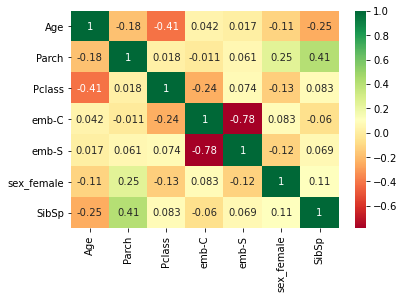

In [37]:
Selected_features = ['Age', 'Parch', 'Pclass', 'emb-C', 'emb-S', 'sex_female', 'SibSp']
X = train[Selected_features]
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

### TRAIN TEST SPLIT

In [38]:
X = train[Selected_features]
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [39]:
logreg = LogisticRegression()


In [40]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [42]:
roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])

0.8669286204239248

In [43]:
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.8325316455696202

In [44]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [45]:
fpr,tpr,thr

(array([0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03,
        0.04, 0.04, 0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.09, 0.09, 0.11,
        0.11, 0.14, 0.14, 0.15, 0.18, 0.18, 0.19, 0.19, 0.2 , 0.2 , 0.21,
        0.21, 0.26, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.34, 0.35, 0.37, 0.4 ,
        0.41, 0.43, 0.45, 0.48, 0.48, 0.49, 0.51, 0.53, 0.53, 0.6 , 0.69,
        0.7 , 0.7 , 0.74, 0.75, 0.75, 0.78, 0.79, 0.82, 0.82, 0.85, 0.89,
        0.89, 0.92, 0.92, 1.  ]),
 array([0.        , 0.01265823, 0.30379747, 0.30379747, 0.35443038,
        0.35443038, 0.37974684, 0.37974684, 0.48101266, 0.50632911,
        0.51898734, 0.51898734, 0.53164557, 0.53164557, 0.56962025,
        0.56962025, 0.60759494, 0.60759494, 0.64556962, 0.64556962,
        0.65822785, 0.65822785, 0.67088608, 0.67088608, 0.69620253,
        0.69620253, 0.70886076, 0.74683544, 0.74683544, 0.75949367,
        0.75949367, 0.7721519 , 0.7721519 , 0.78481013, 0.78481013,
        0.79746835, 0.79746835, 0.79746835, 0.

In [46]:
y_pred=logreg.predict(X_test)

In [47]:
print(f'accuracy of logistic regression is:{accuracy_score(y_test, y_pred)}')

accuracy of logistic regression is:0.8044692737430168


In [48]:
print(f'log loss of logistic regression is :{log_loss(y_test, y_pred_proba)}')

log loss of logistic regression is :0.5021027952896002


In [49]:
print(f'logistic regression auc is:{auc(fpr, tpr)}')

logistic regression auc is:0.8325316455696202


ROC-AUC PLOT

### Model evaluation based on K-fold cross-validation using cross_val_score() function

In [50]:
logreg = LogisticRegression()

In [51]:
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss=cross_val_score(logreg, X, y, cv=10, scoring="neg_log_loss")
scores_auc=cross_val_score(logreg, X, y, cv=10, scoring="roc_auc")
print(f'logistic regression average accuracy is:{scores_accuracy.mean()}')
print(f'logistic regression log loss is:{scores_log_loss.mean()}')
print(f'logistic regression auc score is:{scores_auc.mean()}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

logistic regression average accuracy is:0.8058551810237203
logistic regression log loss is:-0.4468728853295879
logistic regression auc score is:0.8536029482500072


In [52]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
predictions = logreg.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       449
           1       0.78      0.72      0.75       263

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712



In [54]:
filename = 'D:\\Data\\final_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

<IPython.core.display.Javascript object>

In [55]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

<IPython.core.display.Javascript object>

In [60]:
X_train2=test.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin"], axis=1)
 

In [57]:
train_pred = loaded_model.predict_proba(X_train)
test_pred = loaded_model.predict_proba(X_test) 

In [59]:
roc_auc_score(y_train, train_pred[:,1])

0.8669286204239248

In [62]:
roc_auc_score(y_test, test_pred[:,1])

0.8325316455696202